# تحميل (استيراد) المكتبات الأساسية
# Importing

In [6]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# تحميل البيانات

In [7]:
# Load all re-uploaded data
df_sw = pd.read_csv("spaceweather.csv", index_col=0).iloc[1:].copy()
df_science_raw = pd.read_csv("علوم الفضاء.csv", sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')
df_solar_raw = pd.read_csv("كسوف الشمس.csv", sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')
df_lunar_raw = pd.read_csv("خسوف القمر.csv", sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')

# العمليات و فصل المتغيرات

In [8]:
# Reprocess datasets
df_sw_clean = pd.DataFrame({
    "Month": pd.to_datetime(df_sw.index),
    "Event Count": pd.to_numeric(df_sw[df_sw.columns[0]]) / 100
})

df_science_cleaned = df_science_raw.iloc[1:, 0].str.split(",", expand=True)
df_science_cleaned.columns = ["Month", "Event Count"]
df_science_cleaned["Month"] = pd.to_datetime(df_science_cleaned["Month"])
df_science_cleaned["Event Count"] = pd.to_numeric(df_science_cleaned["Event Count"]) / 100

def clean_eclipse_data(df):
    split_df = df.iloc[1:, 0].str.split(",", expand=True)
    split_df.columns = ["Month", "Event Count"]
    split_df["Month"] = pd.to_datetime(split_df["Month"])
    split_df["Event Count"] = split_df["Event Count"].apply(lambda x: 0.5 if "<1" in x else pd.to_numeric(x))
    split_df["Event Count"] = split_df["Event Count"] / 100
    return split_df

df_solar_cleaned = clean_eclipse_data(df_solar_raw)
df_lunar_cleaned = clean_eclipse_data(df_lunar_raw)

# Define vertical lines
sw_dates = [pd.Timestamp("2023-05-01"), pd.Timestamp("2023-09-01")]
ss_dates = [pd.Timestamp("2018-07-01"), pd.Timestamp("2019-07-01"),
            pd.Timestamp("2020-08-01"), pd.Timestamp("2021-08-01"),
            pd.Timestamp("2022-08-01"), pd.Timestamp("2023-08-01"),
            pd.Timestamp("2024-08-01")]
se_dates = [pd.Timestamp("2006-03-01"), pd.Timestamp("2015-03-01"),
            pd.Timestamp("2022-10-01"), pd.Timestamp("2024-04-01")]
le_dates = [pd.Timestamp("2011-06-01"), pd.Timestamp("2018-07-01")]

# عرض النتائج

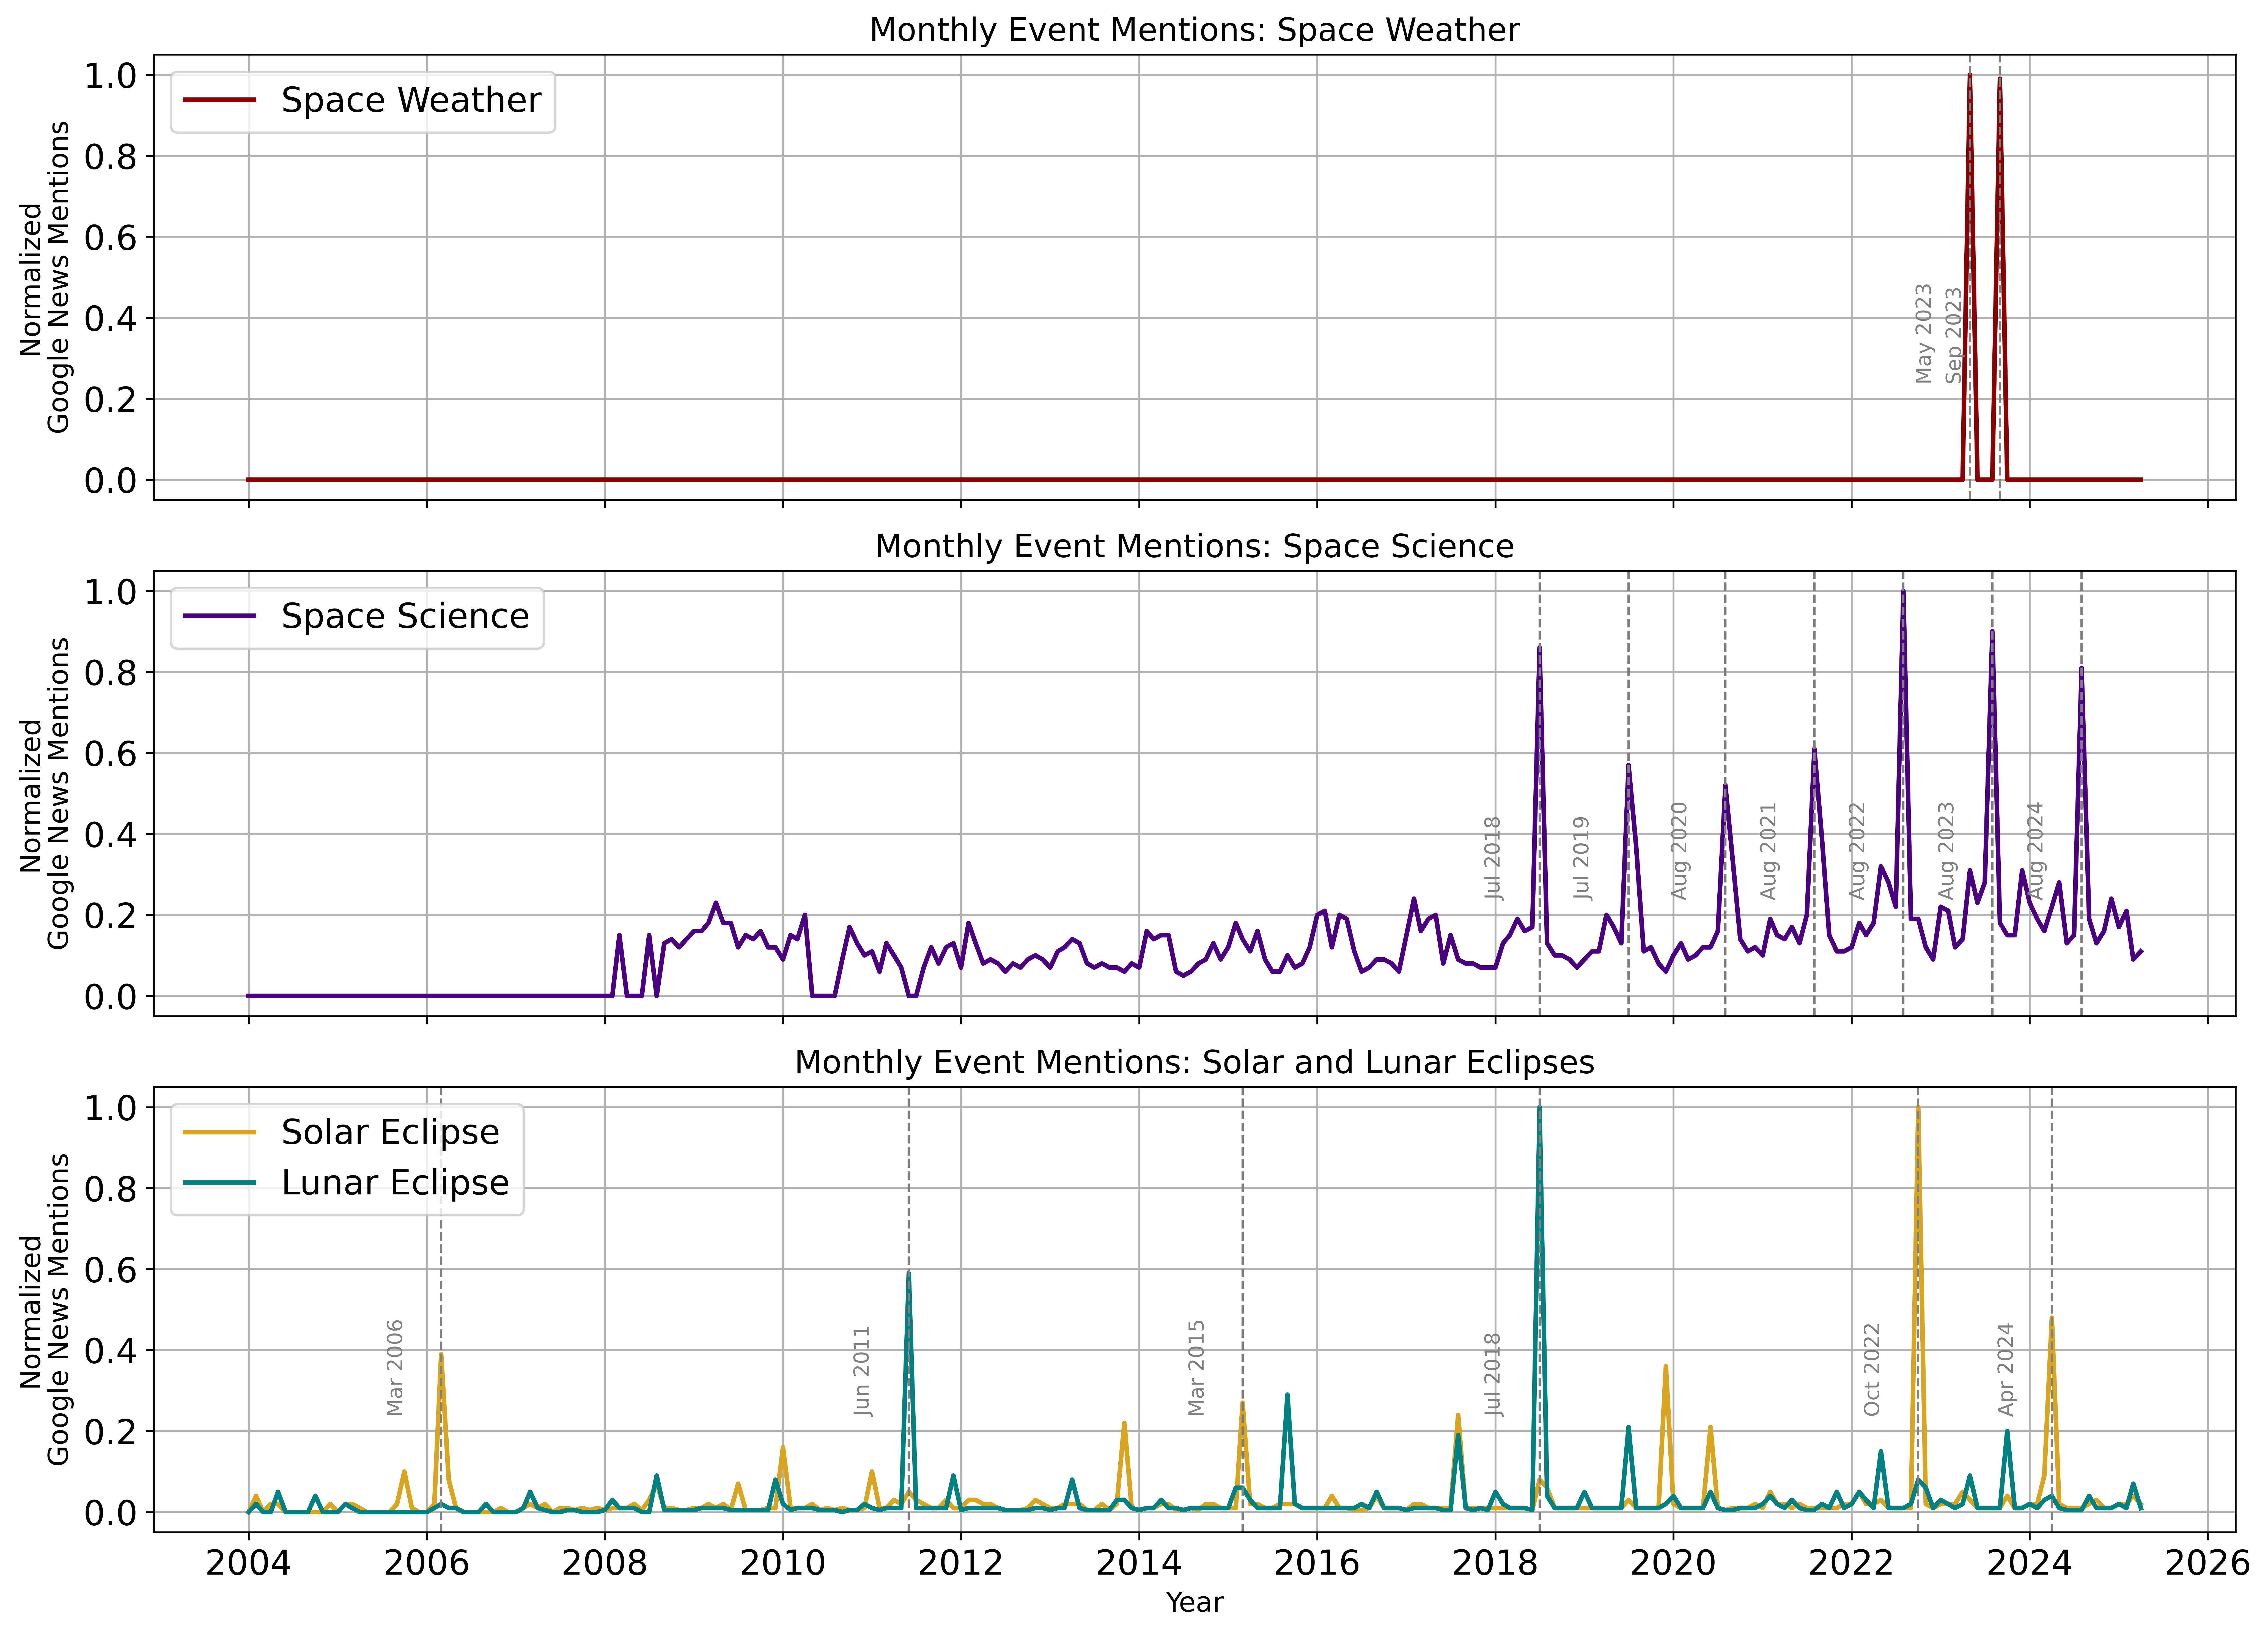

In [9]:
# Plot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), dpi=600, sharex=True)

# Subplot 1: Space Weather
axs[0].plot(df_sw_clean["Month"], df_sw_clean["Event Count"], label="Space Weather", color='darkred', linewidth=2)
for date in sw_dates:
    axs[0].axvline(x=date, color='gray', linestyle='--', linewidth=1)
    axs[0].annotate(date.strftime('%b %Y'), xy=(date, 0.02), xytext=(-15, 40),
                    textcoords='offset points', ha='right', fontsize=9, rotation=90, color='gray')
axs[0].set_title("Monthly Event Mentions: Space Weather", fontsize=14)
axs[0].set_ylabel("Normalized\nGoogle News Mentions", fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=15)
axs[0].tick_params(axis='both', labelsize=15)

# Subplot 2: Space Science
axs[1].plot(df_science_cleaned["Month"], df_science_cleaned["Event Count"], label="Space Science", color='indigo', linewidth=2)
for date in ss_dates:
    axs[1].axvline(x=date, color='gray', linestyle='--', linewidth=1)
    axs[1].annotate(date.strftime('%b %Y'), xy=(date, 0.02), xytext=(-15, 40),
                    textcoords='offset points', ha='right', fontsize=9, rotation=90, color='gray')
axs[1].set_title("Monthly Event Mentions: Space Science", fontsize=14)
axs[1].set_ylabel("Normalized\nGoogle News Mentions", fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=15)
axs[1].tick_params(axis='both', labelsize=15)

# Subplot 3: Eclipses
axs[2].plot(df_solar_cleaned["Month"], df_solar_cleaned["Event Count"], label="Solar Eclipse", color='goldenrod', linewidth=2)
axs[2].plot(df_lunar_cleaned["Month"], df_lunar_cleaned["Event Count"], label="Lunar Eclipse", color='teal', linewidth=2)
for date in se_dates:
    axs[2].axvline(x=date, color='gray', linestyle='--', linewidth=1)
    axs[2].annotate(date.strftime('%b %Y'), xy=(date, 0.02), xytext=(-15, 40),
                    textcoords='offset points', ha='right', fontsize=9, rotation=90, color='gray')
for date in le_dates:
    axs[2].axvline(x=date, color='gray', linestyle='--', linewidth=1)
    axs[2].annotate(date.strftime('%b %Y'), xy=(date, 0.02), xytext=(-15, 40),
                    textcoords='offset points', ha='right', fontsize=9, rotation=90, color='gray')
axs[2].set_title("Monthly Event Mentions: Solar and Lunar Eclipses", fontsize=14)
axs[2].set_xlabel("Year", fontsize=12)
axs[2].set_ylabel("Normalized\nGoogle News Mentions", fontsize=12)
axs[2].grid(True)
axs[2].legend(fontsize=15)
axs[2].tick_params(axis='both', labelsize=15)

# Format x-axis
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()
